# Notebook SAE 202

## Partie II


In [1]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sc
import soundfile as sf
import time
import threading as th


In [2]:
%matplotlib inline

### Reception


In [4]:
# Création du signal modulant
fp = 10000
te = 1/fs
f0 = 10e3
time = np.arange(0, len(data)/fs, te)

AM_modulant = np.sin(2*np.pi*f0*time)

# Modulation du signal en AM


NameError: name 'data' is not defined

In [4]:
fs = 100000
fc = 400
nyquist = fs / 2
fnc = fc / nyquist
order = 8
b, a = sc.butter(order, fnc, btype="low", analog=False)
zi = sc.lfilter_zi(b, a)
start_time = 0

def callback(indata, outdata, frames, time, status):
    global zi
    global start_time
    signal = indata[:, 0]
    te = 1 / fs
    
    time = np.arange(start_time, start_time+len(signal)*te, te)

    f0 = 10e3
    AM_modulant = np.sin(2 * np.pi * f0 * time)
    signalDM = signal * AM_modulant
    
    
    signalF, zi = sc.lfilter(b, a, signalDM, zi=zi)
    
    
    # Ensure the output data has the same shape as the input data
    outdata[:, 1] = signalF
    outdata[:, 0] = signal
    #print(signalDM)


stream = sd.Stream(samplerate=fs, callback=callback)
try:
    with stream:
        print("#" * 80)
        print("press Return to exit")
        print("#" * 80)
        input()
except KeyboardInterrupt:
    exit('')

################################################################################
press Return to exit
################################################################################


Démarrage du stream
Réception du chunk numéro 0 dont le premier éléments vaut [-6.1035156e-05]
Réception du chunk numéro 1 dont le premier éléments vaut [-3.0517578e-05]
Réception du chunk numéro 2 dont le premier éléments vaut [-6.1035156e-05]
Réception du chunk numéro 3 dont le premier éléments vaut [0.]
Réception du chunk numéro 4 dont le premier éléments vaut [-6.1035156e-05]
Réception du chunk numéro 5 dont le premier éléments vaut [0.]
Réception du chunk numéro 6 dont le premier éléments vaut [-3.0517578e-05]
Réception du chunk numéro 7 dont le premier éléments vaut [3.0517578e-05]
Réception du chunk numéro 8 dont le premier éléments vaut [3.0517578e-05]
Réception du chunk numéro 9 dont le premier éléments vaut [-6.1035156e-05]
Réception du chunk numéro 10 dont le premier éléments vaut [0.]
Réception du chunk numéro 11 dont le premier éléments vaut [-6.1035156e-05]
Réception du chunk numéro 12 dont le premier éléments vaut [-9.1552734e-05]
Réception du chunk numéro 13 dont le pre

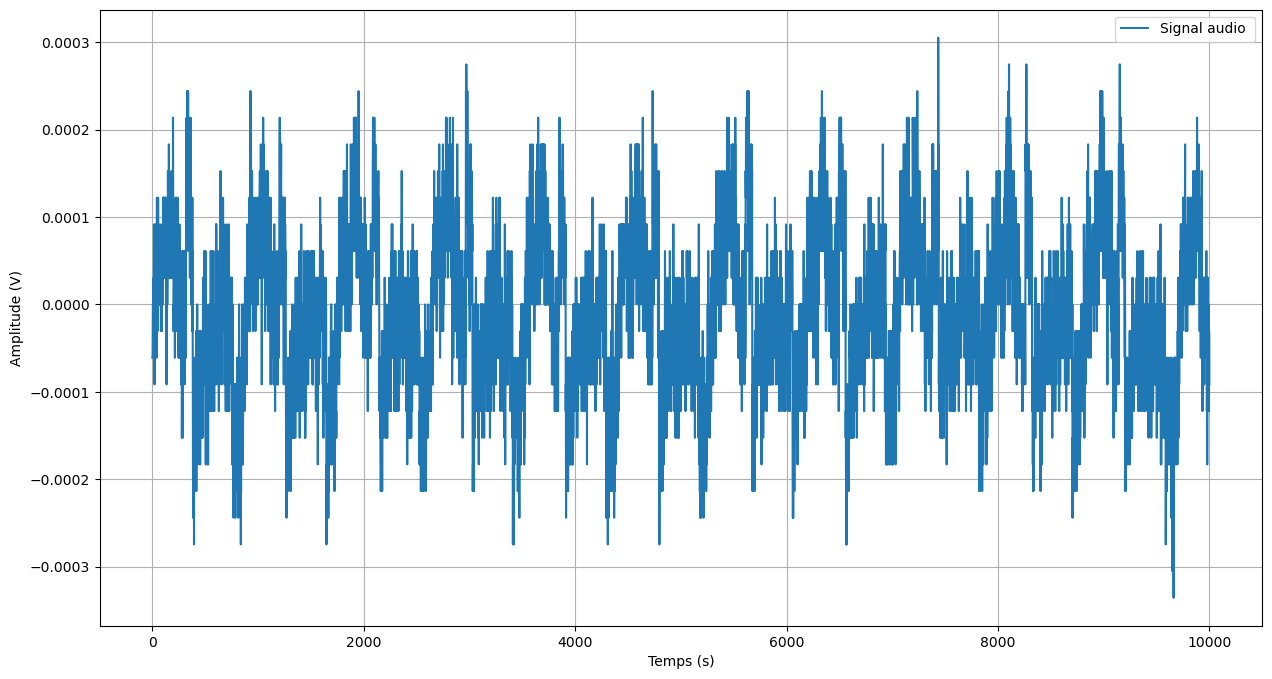

In [4]:
#print(sd.query_devices())

nombre_blocs = 0
signal = 0



def print_number(indata, frames, time, status):
    global nombre_blocs
    print(f"Réception du chunk numéro {nombre_blocs} dont le premier éléments vaut {indata[0]}")
    nombre_blocs += 1
    global signal
    signal = indata
stream = sd.InputStream(callback=print_number, blocksize=10000, channels=1)
print("Démarrage du stream")
stream.start()
time.sleep(30)
stream.stop()
print("FIn du stream")
print(f"{nombre_blocs} bloc ont été reçu")
sd.play(signal, samplerate=10000)
print(signal)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

ax.plot(signal, label="Signal audio ")
#ax[0].semilogx(f_tranche, fft_mono_dbm, linewidth = 2)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("Amplitude (V)")
#ax[0].set_xlim(10, 10.01)
ax.legend(loc="upper right")
ax.grid(True)


**Récupération du signal et de la porteuse :**

In [47]:
###########################################
# Filtre passe bande
###########################################
fs = 100000
nyquist = fs / 2
fc1 = 9900
fc2 = 10100
order = 12
coeff_sos = sc.butter(order, [fc1/nyquist, fc2/nyquist], btype="bandpass", analog=False, output='sos')
zi = sc.sosfilt_zi(coeff_sos)

###########################################
# Filtre passe bas
###########################################

fs = 100000
fc = 5000
nyquist = fs / 2
fnc = fc / nyquist
order2 = 4
coeff_sos_2 = sc.butter(order2, fnc, btype="low", analog=False, output="sos")
zi_2 = sc.sosfilt_zi(coeff_sos_2)


##########################################
# Filtre stop bande
##########################################
fs = 100000
fc1 = 9900
fc2 = 10100
nysquist = fs / 2
order = 12
coeff_sos_3 = sc.butter(order, [fc1/nyquist, fc2/nyquist], btype="bandstop", analog=False, output='sos')
zi_1 = sc.sosfilt_zi(coeff_sos_3)



audio_signal = []
AM_down_complet = []
AM_sans_porteuse_complet = []
porteuse_complet = []
def callback(indata, outdata, frames, time, status):
    global zi
    global zi_1
    global zi_2
    global audio_signal
    global AM_down_complet
    global AM_sans_porteuse_complet
    global porteuse_complet
    #outdata[:] = indata
    signal = indata[:,0]
    porteuse, zi = sc.sosfilt(coeff_sos, signal, zi=zi)
    AM_down =  signal * porteuse
    audio, zi_2 = sc.sosfilt(coeff_sos_2, AM_down, zi=zi_2)
    outdata[:,0] = audio
    

    audio_signal.extend(outdata[:])
    AM_down_complet.extend(AM_down[:])
    #AM_sans_porteuse_complet.extend(AM_sans_porteuse[:])
    porteuse_complet.extend(porteuse[:])

    
    #print(signalDM)


stream = sd.Stream(samplerate=fs, callback=callback, channels=1)
try:
    with stream:
        print("#" * 80)
        print("press Return to exit")
        print("#" * 80)
        input()
except KeyboardInterrupt:
    exit('')

audio_signal = np.array(audio_signal)
AM_down_complet = np.array(AM_down_complet)
AM_sans_porteuse_complet = np.array(AM_sans_porteuse_complet)
porteuse_complet = np.array(porteuse_complet)



################################################################################
press Return to exit
################################################################################


C:\Users\Clement\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


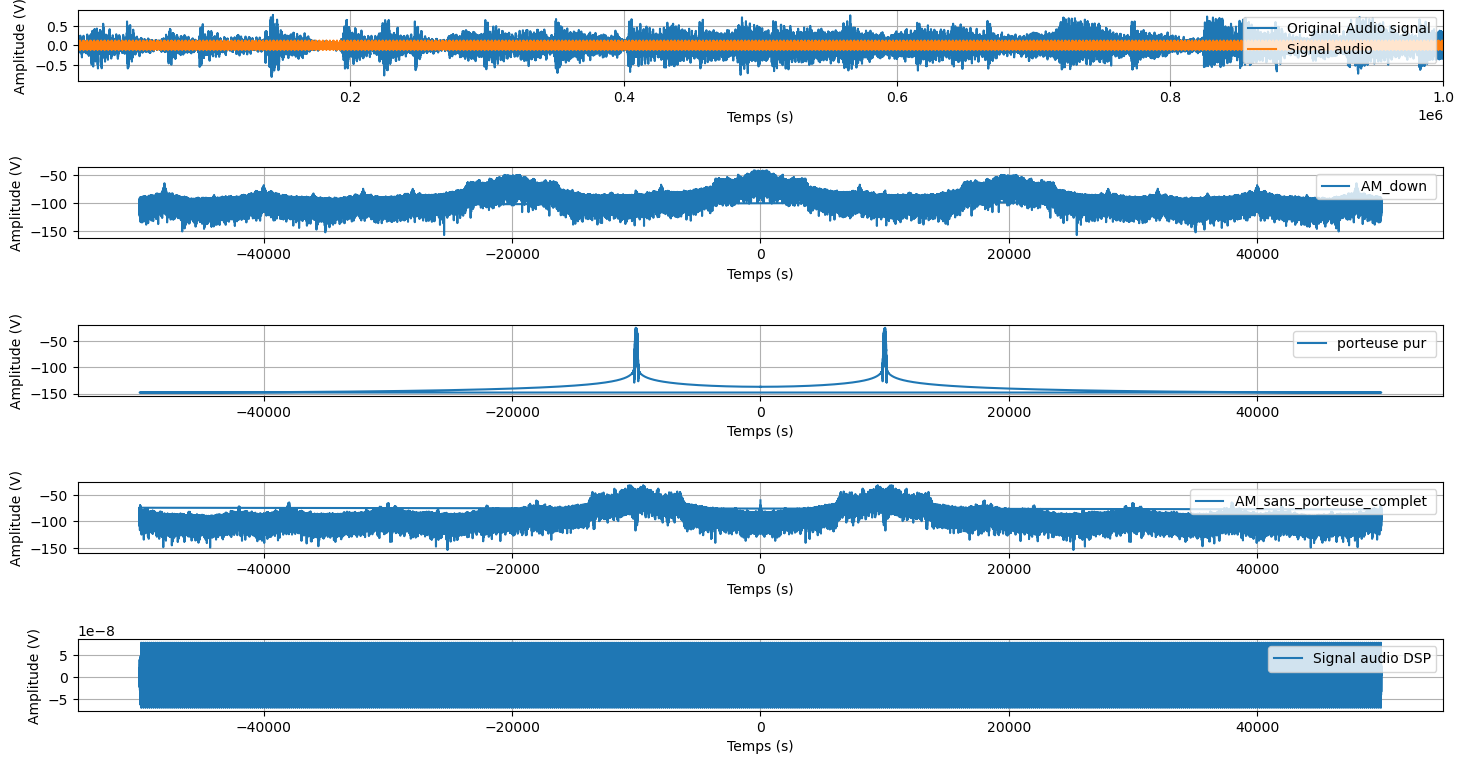

In [41]:
data, fs = sf.read('NR4.wav', always_2d=True)


N = len(AM_down_complet)
tfft_AM_down_complet = N*fs

fft_AM_down_complet = (1/N)*(np.fft.fft(AM_down_complet))

# Calcul de la FFT Monolatérale
#fft_mono_modul = np.concatenate((fft_modul[0:1], 2*fft_modul[1:int(N/2)]))
# On calcul la valeur absolue de fft_mono pour obtenir la fft monolatérale
#fft_mono_abs_modul = np.abs(fft_mono_modul)


# Calcul de la Densité spectrale en Volt efficace sur RBW
fft_eff_AM_down_complet = fft_AM_down_complet/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
fft_dbm_AM_down_complet = 10*np.log10(np.square(fft_eff_AM_down_complet)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f_AM_down_complet = np.fft.fftfreq(N, 1/fs)


N_port= len(porteuse_complet)
tfft_porteuse_complet = N_port*fs

fft_porteuse_complet = (1/N_port)*(np.fft.fft(porteuse_complet))

# Calcul de la FFT Monolatérale
#fft_mono_modul = np.concatenate((fft_modul[0:1], 2*fft_modul[1:int(N/2)]))
# On calcul la valeur absolue de fft_mono pour obtenir la fft monolatérale
#fft_mono_abs_modul = np.abs(fft_mono_modul)


# Calcul de la Densité spectrale en Volt efficace sur RBW
fft_eff_porteuse_complet = fft_porteuse_complet/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
fft_dbm_porteuse_complet = 10*np.log10(np.square(fft_eff_porteuse_complet)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f_porteuse_complet = np.fft.fftfreq(N_port, 1/fs)


N_down= len(AM_sans_porteuse_complet)
tfft_AM_sans_porteuse_complet = N_down*fs

fft_AM_sans_porteuse_complet = (1/N_down)*(np.fft.fft(AM_sans_porteuse_complet))

# Calcul de la FFT Monolatérale
#fft_mono_modul = np.concatenate((fft_modul[0:1], 2*fft_modul[1:int(N/2)]))
# On calcul la valeur absolue de fft_mono pour obtenir la fft monolatérale
#fft_mono_abs_modul = np.abs(fft_mono_modul)


# Calcul de la Densité spectrale en Volt efficace sur RBW
fft_eff_AM_sans_porteuse_complet = fft_AM_sans_porteuse_complet/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
fft_dbm_AM_sans_porteuse_complet = 10*np.log10(np.square(fft_eff_AM_sans_porteuse_complet)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f_AM_sans_porteuse_complet = np.fft.fftfreq(N_down, 1/fs)



N_audio_signal= len(audio_signal)
tfft_audio_signal = N_audio_signal*fs

fft_audio_signal = (1/N_audio_signal)*(np.fft.fft(audio_signal))

# Calcul de la FFT Monolatérale
#fft_mono_modul = np.concatenate((fft_modul[0:1], 2*fft_modul[1:int(N/2)]))
# On calcul la valeur absolue de fft_mono pour obtenir la fft monolatérale
#fft_mono_abs_modul = np.abs(fft_mono_modul)


# Calcul de la Densité spectrale en Volt efficace sur RBW
fft_eff_audio_signal = fft_audio_signal/np.sqrt(2)

# Calcul de la Densité spectrale en dBm sur RBW
fft_dbm_audio_signal = 10*np.log10(np.square(fft_eff_audio_signal)/50*1000)

# Calcul de la plage de fréquence pour la FFT
f_audio_signal = np.fft.fftfreq(N_audio_signal, 1/fs)


fig, ax = plt.subplots(5, 1, figsize=(15, 8))
ax[0].plot(data, label="Original Audio signal")
ax[0].plot(audio_signal, label="Signal audio ")
ax[0].set_xlabel("Temps (s)")
ax[0].set_ylabel("Amplitude (V)")
ax[0].set_xlim(200, 1000000)
ax[0].legend(loc="upper right")
ax[0].grid(True)

ax[4].plot(f_audio_signal, fft_audio_signal, label="Signal audio DSP")
ax[4].set_xlabel("Temps (s)")
ax[4].set_ylabel("Amplitude (V)")
ax[4].legend(loc="upper right")
ax[4].grid(True)


ax[1].plot(f_AM_down_complet, fft_dbm_AM_down_complet, label="AM_down ")
ax[1].set_xlabel("Temps (s)")
ax[1].set_ylabel("Amplitude (V)")
#ax[0].set_xlim(10, 10.01)
ax[1].legend(loc="upper right")
ax[1].grid(True)

ax[2].plot(f_porteuse_complet, fft_dbm_porteuse_complet, label="porteuse pur ")
ax[2].set_xlabel("Temps (s)")
ax[2].set_ylabel("Amplitude (V)")
#ax[0].set_xlim(10, 10.01)
ax[2].legend(loc="upper right")
ax[2].grid(True)

ax[3].plot(f_AM_sans_porteuse_complet, fft_dbm_AM_sans_porteuse_complet, label="AM_sans_porteuse_complet ")
ax[3].set_xlabel("Temps (s)")
ax[3].set_ylabel("Amplitude (V)")
#ax[0].set_xlim(10, 10.01)
ax[3].legend(loc="upper right")
ax[3].grid(True)

fig.tight_layout(pad=2.0)
plt.show()



### Emission

In [5]:
print(sd.query_devices())

   0 Mappeur de sons Microsoft - Input, MME (2 in, 0 out)
>  1 Microphone (USB Audio Device), MME (1 in, 0 out)
   2 Microphone (Conexant ISST Audio, MME (2 in, 0 out)
   3 Mappeur de sons Microsoft - Output, MME (0 in, 2 out)
<  4 Haut-parleur (Conexant ISST Aud, MME (0 in, 6 out)
   5 Haut-parleurs (USB Audio Device, MME (0 in, 2 out)
   6 Réseau de microphones (Conexant ISST Audio capture), Windows WDM-KS (2 in, 0 out)
   7 Mixage stéréo (Conexant ISST Audio capture), Windows WDM-KS (2 in, 0 out)
   8 Output 1 (Conexant ISST Audio output), Windows WDM-KS (0 in, 2 out)
   9 Output 2 (Conexant ISST Audio output), Windows WDM-KS (0 in, 6 out)
  10 Input (Conexant ISST Audio output), Windows WDM-KS (2 in, 0 out)
  11 Headphones (Conexant ISST Audio headphone), Windows WDM-KS (0 in, 2 out)
  12 Casque (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free%0
;(Redmi Buds 4)), Windows WDM-KS (0 in, 1 out)
  13 Casque (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free%0
;(Redmi Buds 4)), Windows 

In [6]:
event = th.Event()

try:
    data, fs = sf.read('NR4.wav', always_2d=True)
    current_frame = 0

    def callback(outdata, frames, time, status):
        global current_frame
        if status:
            print(status)

        chunksize = min(len(data) - current_frame, frames )
        audio = data[current_frame:current_frame + chunksize]
        outdata[:] = audio
        if chunksize < frames:
            outdata[chunksize] = 0
            raise sd.CallbackStop()
        current_frame += chunksize

    stream = sd.OutputStream(samplerate = fs, callback=callback, finished_callback=event.set)

    with stream :
        event.wait()

except KeyboardInterrupt:
    exit('\nInterrupted by  user')
    


Exception ignored from cffi callback <function _StreamBase.__init__.<locals>.callback_ptr at 0x000001F7DDFB4EA0>:
Traceback (most recent call last):
  File "C:\Users\Clement\anaconda3\Lib\site-packages\sounddevice.py", line 862, in callback_ptr
    return _wrap_callback(callback, data, frames, time, status)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Clement\anaconda3\Lib\site-packages\sounddevice.py", line 2687, in _wrap_callback
    callback(*args)
  File "C:\Users\Clement\AppData\Local\Temp\ipykernel_19440\2035060037.py", line 14, in callback
ValueError: could not broadcast input array from shape (2048,1) into shape (2576,6)


**Transmission d'un signal modulé**

In [8]:
# Création du signal modulant
fp = 10000
te = 1/fs
f0 = 10e3
time = np.arange(0, len(data)/fs, te)

AM_modulant = np.sin(2*np.pi*f0*time)

# Modulation du signal en AM






In [12]:
event = th.Event()

try:
    data, fs = sf.read('NR4.wav', always_2d=True)
    current_frame = 0
    modulated_signal = AM_modulant * data[:, 0]
    
    def callback(outdata, frames, time, status):
        global current_frame
        if status:
            print(status)

        chunksize = min(len(modulated_signal) - current_frame, frames )
        audio = modulated_signal[current_frame:current_frame + chunksize]
        outdata[:, 0] = audio
        if chunksize < frames:
            outdata[chunksize] = 0
            raise sd.CallbackStop()
        current_frame += chunksize

    stream = sd.OutputStream(samplerate = fs, callback=callback, finished_callback=event.set)

    with stream :
        event.wait()

except KeyboardInterrupt:
    exit('\nInterrupted by  user')
    

Exception ignored from cffi callback <function _StreamBase.__init__.<locals>.callback_ptr at 0x0000017C154EDB20>:
Traceback (most recent call last):
  File "C:\Users\Clement\anaconda3\Lib\site-packages\sounddevice.py", line 862, in callback_ptr
    return _wrap_callback(callback, data, frames, time, status)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Clement\anaconda3\Lib\site-packages\sounddevice.py", line 2687, in _wrap_callback
    callback(*args)
  File "C:\Users\Clement\AppData\Local\Temp\ipykernel_9324\1951650648.py", line 15, in callback
ValueError: could not broadcast input array from shape (2048,) into shape (2576,)


**Création du signal avant l'envoie**

In [11]:
data, fs = sf.read('NR4.wav', always_2d=True)

fp = 10000
te = 1/fs
f0 = 10e3
time = np.arange(0, len(data)/fs, te)


AM_modulé = np.sin(2*np.pi*fp*time)
modulated_signal = AM_modulé * data[:, 0] + 0.5*AM_modulé



**Transmission d'un signal avec la porteuse**

In [12]:
# Création du signal modulant
fp = 10000
te = 1/fs
f0 = 10e3
time = np.arange(0, len(data)/fs, te)

AM_modulant = np.sin(2*np.pi*f0*time)

# Modulation du signal en AM

event = th.Event()

try:
    data, fs = sf.read('NR4.wav', always_2d=True)
    current_frame = 0
    
    def callback(outdata, frames, time, status):
        global current_frame
        if status:
            print(status)

        chunksize = min(len(modulated_signal) - current_frame, frames )
        audio = modulated_signal[current_frame:current_frame + chunksize]
        outdata[:, 0] = audio
        if chunksize < frames:
            outdata[chunksize] = 0
            raise sd.CallbackStop()
        current_frame += chunksize

    stream = sd.OutputStream(samplerate = fs, callback=callback, finished_callback=event.set)

    with stream :
        event.wait()

except KeyboardInterrupt:
    exit('\nInterrupted by  user')
    

Exception ignored from cffi callback <function _StreamBase.__init__.<locals>.callback_ptr at 0x000001A0920544A0>:
Traceback (most recent call last):
  File "C:\Users\Clement\anaconda3\Lib\site-packages\sounddevice.py", line 862, in callback_ptr
    return _wrap_callback(callback, data, frames, time, status)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Clement\anaconda3\Lib\site-packages\sounddevice.py", line 2687, in _wrap_callback
    callback(*args)
  File "C:\Users\Clement\AppData\Local\Temp\ipykernel_27632\707166351.py", line 24, in callback
ValueError: could not broadcast input array from shape (2048,) into shape (2576,)


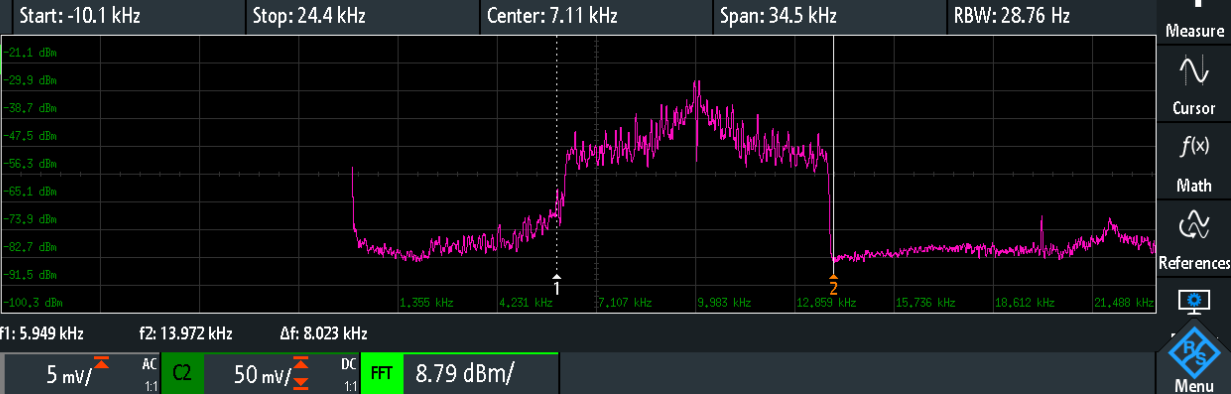